# Drenthe

In [1]:
import os

In [2]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Drenthe')

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
Drenthe_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Drenthe\Drenthe.shp')

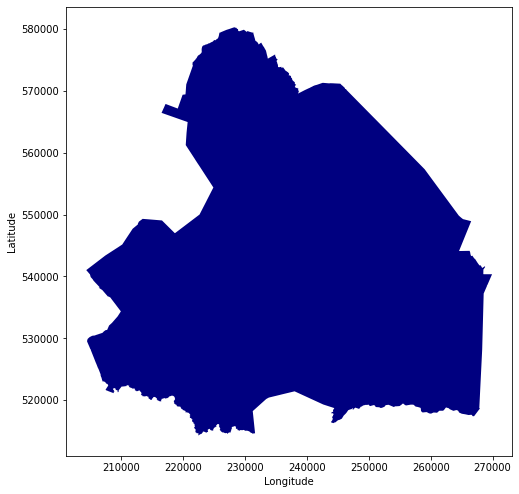

In [6]:
fig, ax = plt.subplots(1, figsize = (8,12))
Drenthe_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [7]:
Drenthe_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [8]:
from osgeo import gdal, ogr, osr

In [9]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Drenthe\Drenthe.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [10]:
#column_names
source_layer.GetExtent()

(204347.983, 269918.65, 514316.087, 580247.15)

In [11]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Drenthe_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:2186, y_res:2198
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCB4D78D50> >


In [12]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [13]:
import xarray as xr
import rasterio

In [14]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-14-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [15]:
raster

<xarray.DataArray (y: 2198, x: 2186)>
[4804828 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 5.802e+05 5.802e+05 5.802e+05 ... 5.144e+05 5.143e+05
  * x        (x) float64 2.044e+05 2.044e+05 2.044e+05 ... 2.699e+05 2.699e+05
Attributes:
    transform:   (30.0, 0.0, 204347.983, 0.0, -30.0, 580247.15)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [16]:
raster.shape

(2198, 2186)

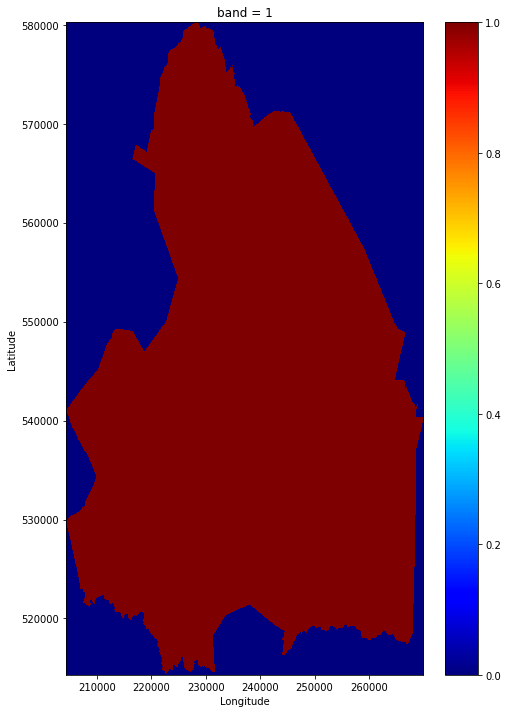

In [17]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Flevoland

In [25]:
import os

In [26]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Flevoland')

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
Flevoland_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Flevoland\Flevoland.shp')

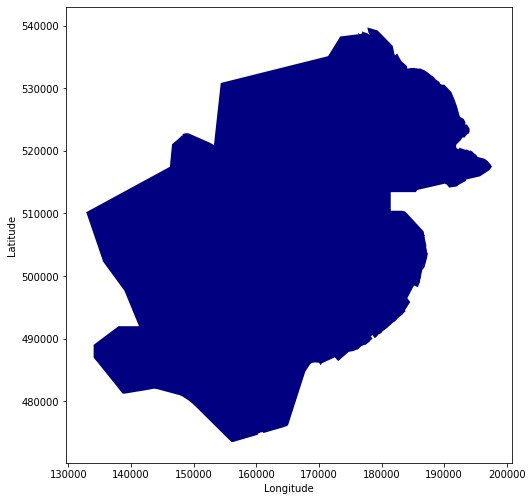

In [29]:
fig, ax = plt.subplots(1, figsize = (8,12))
Flevoland_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [30]:
Flevoland_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [31]:
from osgeo import gdal, ogr, osr

In [32]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Flevoland\Flevoland.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [33]:
#column_names
source_layer.GetExtent()

(132850.0, 197647.35, 473498.15, 539695.823)

In [34]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Flevoland_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:2160, y_res:2207
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC5F35AE0> >


In [35]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [36]:
import xarray as xr
import rasterio

In [37]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-37-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [38]:
raster

<xarray.DataArray (y: 2207, x: 2160)>
[4767120 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 5.397e+05 5.397e+05 5.396e+05 ... 4.735e+05 4.735e+05
  * x        (x) float64 1.329e+05 1.329e+05 1.329e+05 ... 1.976e+05 1.976e+05
Attributes:
    transform:   (30.0, 0.0, 132850.0, 0.0, -30.0, 539695.823)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [39]:
raster.shape

(2207, 2160)

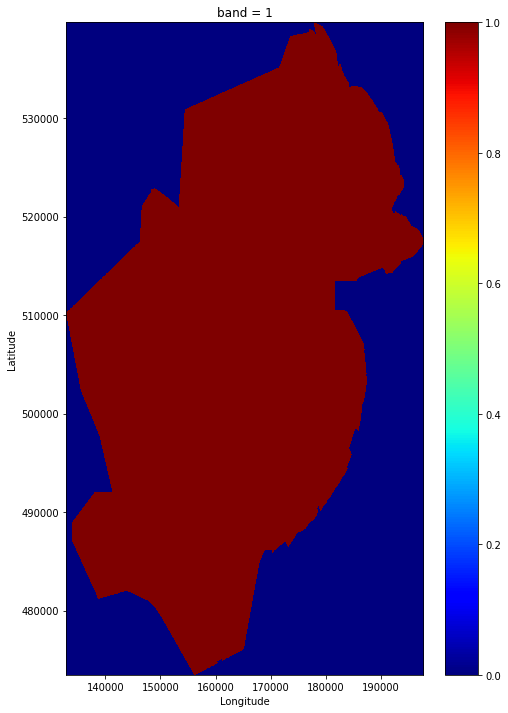

In [40]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Fryslân

In [41]:
import os

In [42]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Fryslân')

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
Fryslân_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Fryslân\Fryslân.shp')

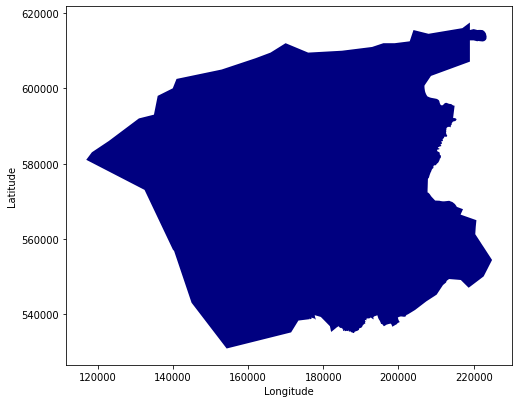

In [45]:
fig, ax = plt.subplots(1, figsize = (8,12))
Fryslân_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [47]:
Fryslân_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [48]:
from osgeo import gdal, ogr, osr

In [49]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Fryslân\Fryslân.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [50]:
#column_names
source_layer.GetExtent()

(117000.0, 224891.16, 530832.17, 617500.0)

In [51]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Fryslân_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:3596, y_res:2889
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC622A780> >


In [52]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [53]:
import xarray as xr
import rasterio

In [54]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-54-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [55]:
raster

<xarray.DataArray (y: 2889, x: 3596)>
[10388844 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 6.175e+05 6.175e+05 6.174e+05 ... 5.309e+05 5.308e+05
  * x        (x) float64 1.17e+05 1.17e+05 1.171e+05 ... 2.248e+05 2.249e+05
Attributes:
    transform:   (30.0, 0.0, 117000.0, 0.0, -30.0, 617500.0)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [56]:
raster.shape

(2889, 3596)

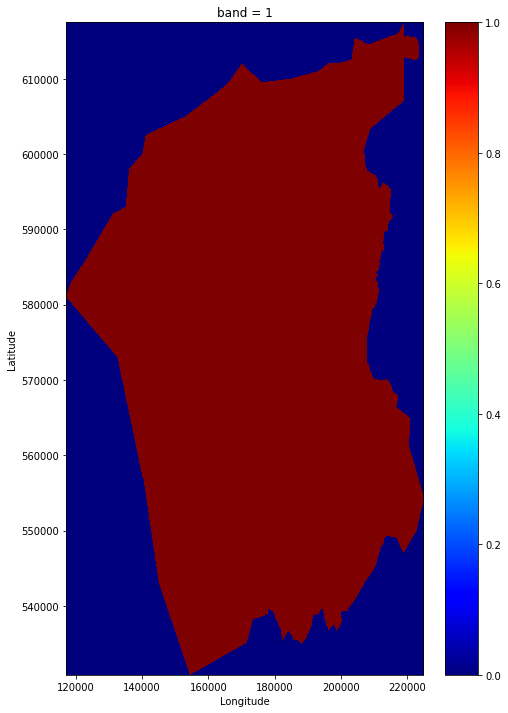

In [57]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Gelderland

In [58]:
import os

In [59]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Gelderland')

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
Gelderland_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Gelderland\Gelderland.shp')

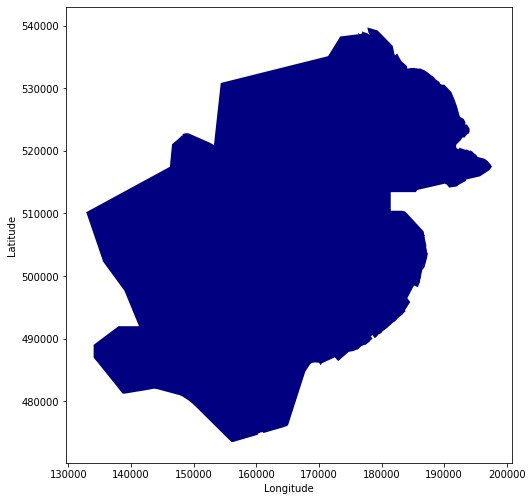

In [62]:
fig, ax = plt.subplots(1, figsize = (8,12))
Flevoland_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [63]:
Gelderland_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [64]:
from osgeo import gdal, ogr, osr

In [65]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Gelderland\Gelderland.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [66]:
#column_names
source_layer.GetExtent()

(127904.225, 254330.03, 416104.0, 503929.772)

In [67]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Gelderland_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:4214, y_res:2928
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC6223A50> >


In [68]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [69]:
import xarray as xr
import rasterio

In [70]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-70-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [71]:
raster

<xarray.DataArray (y: 2928, x: 4214)>
[12338592 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 5.039e+05 5.039e+05 5.039e+05 ... 4.161e+05 4.161e+05
  * x        (x) float64 1.279e+05 1.279e+05 1.28e+05 ... 2.543e+05 2.543e+05
Attributes:
    transform:   (30.0, 0.0, 127904.225, 0.0, -30.0, 503929.772)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [72]:
raster.shape

(2928, 4214)

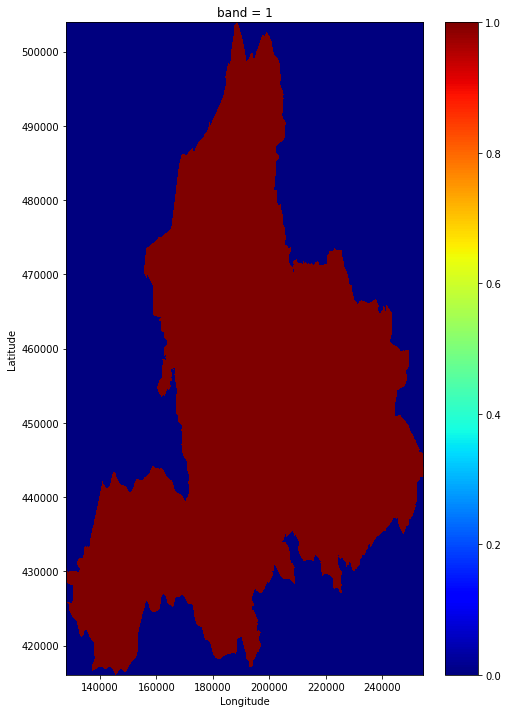

In [73]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Groningen

In [74]:
import os

In [75]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Groningen')

In [76]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
Groningen_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Groningen\Groningen.shp')

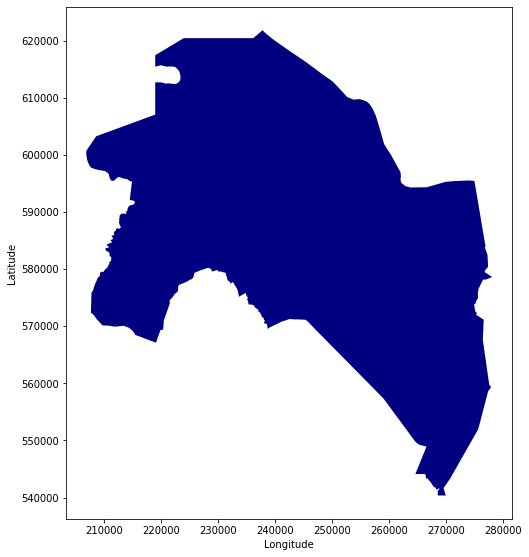

In [78]:
fig, ax = plt.subplots(1, figsize = (8,12))
Groningen_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [79]:
Groningen_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [80]:
from osgeo import gdal, ogr, osr

In [81]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Groningen\Groningen.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [82]:
#column_names
source_layer.GetExtent()

(206911.78, 278026.09, 540346.323, 621876.3)

In [83]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Groningen_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:2370, y_res:2718
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC5F4B480> >


In [84]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [85]:
import xarray as xr
import rasterio

In [86]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-86-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [87]:
raster

<xarray.DataArray (y: 2718, x: 2370)>
[6441660 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 6.219e+05 6.218e+05 6.218e+05 ... 5.404e+05 5.404e+05
  * x        (x) float64 2.069e+05 2.07e+05 2.07e+05 ... 2.78e+05 2.78e+05
Attributes:
    transform:   (30.0, 0.0, 206911.78, 0.0, -30.0, 621876.3)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [88]:
raster.shape

(2718, 2370)

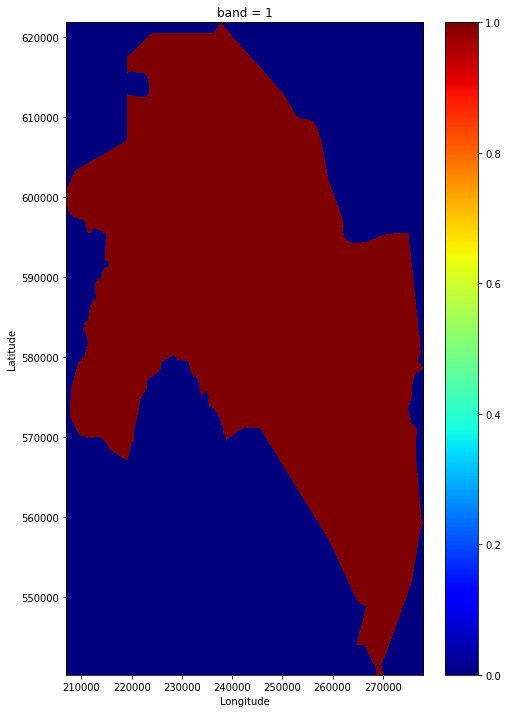

In [89]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Limburg

In [90]:
import os

In [91]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Limburg')

In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
Limburg_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Limburg\Limburg.shp')

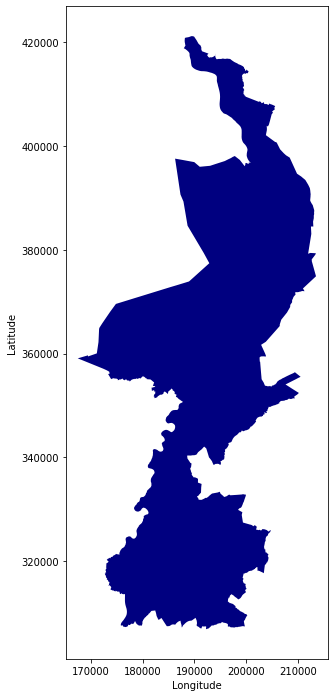

In [94]:
fig, ax = plt.subplots(1, figsize = (8,12))
Limburg_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [95]:
Limburg_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [96]:
from osgeo import gdal, ogr, osr

In [97]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Limburg\Limburg.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [98]:
#column_names
source_layer.GetExtent()

(167494.51, 213448.38, 306846.198, 421225.388)

In [99]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Limburg_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:1532, y_res:3813
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC5E86AB0> >


In [100]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [101]:
import xarray as xr
import rasterio

In [102]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-102-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [103]:
raster

<xarray.DataArray (y: 3813, x: 1532)>
[5841516 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 4.212e+05 4.212e+05 4.212e+05 ... 3.069e+05 3.069e+05
  * x        (x) float64 1.675e+05 1.675e+05 1.676e+05 ... 2.134e+05 2.134e+05
Attributes:
    transform:   (30.0, 0.0, 167494.51, 0.0, -30.0, 421225.388)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [104]:
raster.shape

(3813, 1532)

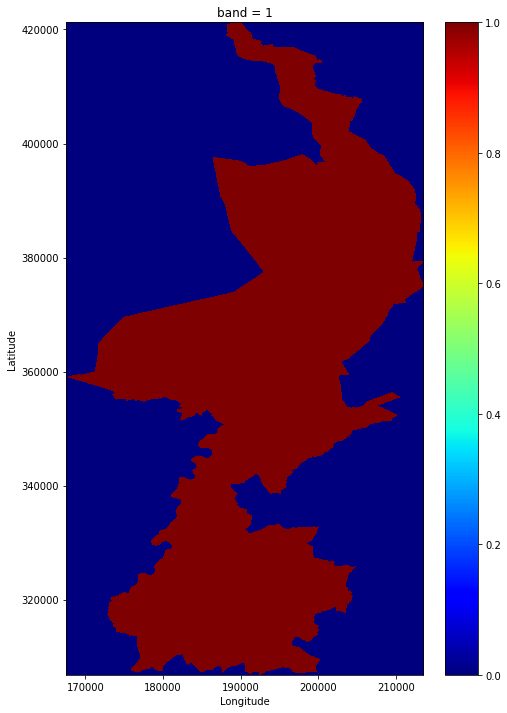

In [105]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Noord-Brabant

In [106]:
import os

In [107]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Noord-Brabant')

In [108]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
Noord_Brabant_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Noord-Brabant\Noord-Brabant.shp')

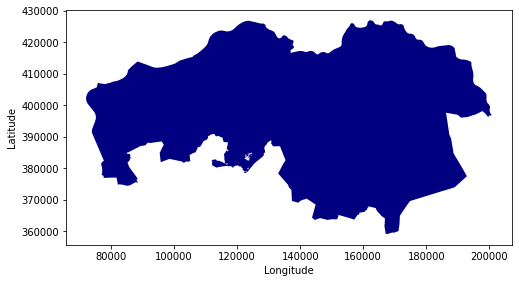

In [110]:
fig, ax = plt.subplots(1, figsize = (8,12))
Noord_Brabant_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [111]:
Noord_Brabant_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [112]:
from osgeo import gdal, ogr, osr

In [113]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Noord-Brabant\Noord-Brabant.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [114]:
#column_names
source_layer.GetExtent()

(72068.806, 200832.554, 359074.9, 426911.0)

In [115]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Noord-Brabant_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:4292, y_res:2261
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC61C4ED0> >


In [116]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [117]:
import xarray as xr
import rasterio

In [118]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-118-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [119]:
raster

<xarray.DataArray (y: 2261, x: 4292)>
[9704212 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 4.269e+05 4.269e+05 4.268e+05 ... 3.591e+05 3.591e+05
  * x        (x) float64 7.208e+04 7.211e+04 7.214e+04 ... 2.008e+05 2.008e+05
Attributes:
    transform:   (30.0, 0.0, 72068.806, 0.0, -30.0, 426911.0)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [120]:
raster.shape

(2261, 4292)

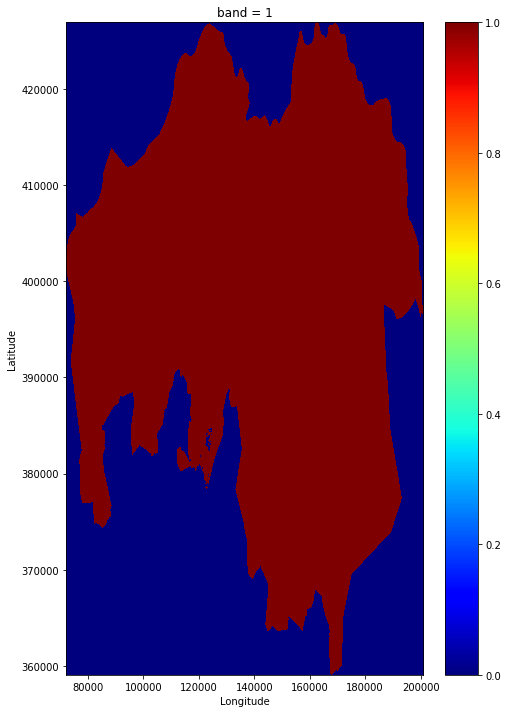

In [121]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Noord-Holland

In [122]:
import os

In [123]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Noord-Holland')

In [124]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
Noord_Holland_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Noord-Holland\Noord-Holland.shp')

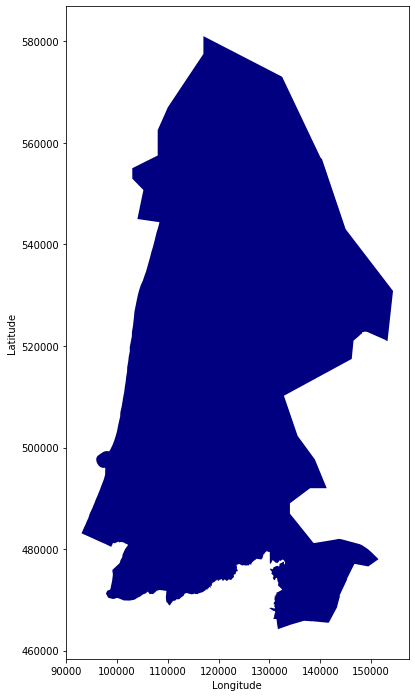

In [126]:
fig, ax = plt.subplots(1, figsize = (8,12))
Noord_Holland_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [127]:
Noord_Holland_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [128]:
from osgeo import gdal, ogr, osr

In [129]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Noord-Holland\Noord-Holland.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [130]:
#column_names
source_layer.GetExtent()

(93004.0, 154328.67, 464251.5, 581000.0)

In [131]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Noord-Holland_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:2044, y_res:3892
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC6748A50> >


In [132]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [133]:
import xarray as xr
import rasterio

In [134]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-134-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [135]:
raster

<xarray.DataArray (y: 3892, x: 2044)>
[7955248 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 5.81e+05 5.81e+05 5.809e+05 ... 4.643e+05 4.643e+05
  * x        (x) float64 9.302e+04 9.305e+04 9.308e+04 ... 1.543e+05 1.543e+05
Attributes:
    transform:   (30.0, 0.0, 93004.0, 0.0, -30.0, 581000.0)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [136]:
raster.shape

(3892, 2044)

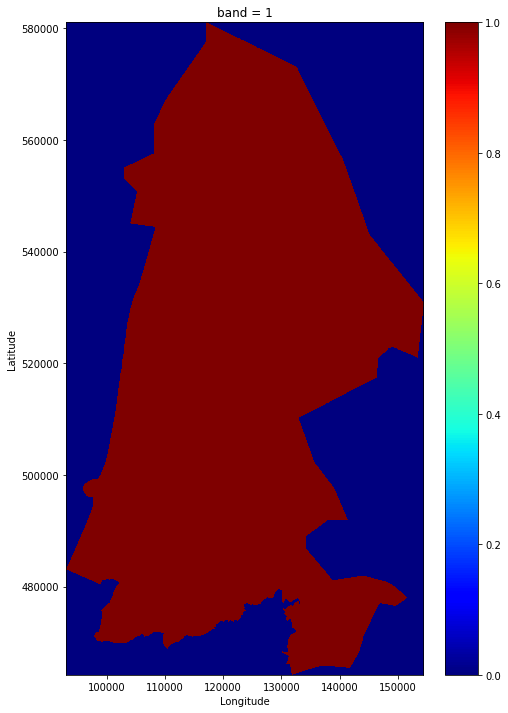

In [137]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Overijssel

In [138]:
import os

In [139]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Overijssel')

In [140]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
Overijssel_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Overijssel\Overijssel.shp')

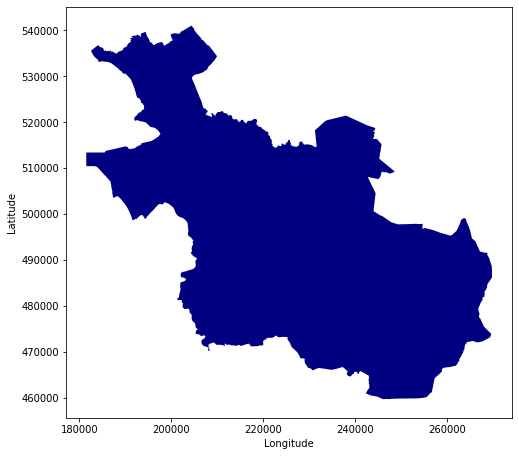

In [142]:
fig, ax = plt.subplots(1, figsize = (8,12))
Overijssel_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [144]:
Overijssel_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [145]:
from osgeo import gdal, ogr, osr

In [148]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Overijssel\Overijssel.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [149]:
#column_names
source_layer.GetExtent()

(181469.93, 269799.23, 459728.033, 541031.753)

In [150]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Overijssel_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:2944, y_res:2710
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC547C360> >


In [151]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [152]:
import xarray as xr
import rasterio

In [153]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-153-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [154]:
raster

<xarray.DataArray (y: 2710, x: 2944)>
[7978240 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 5.41e+05 5.41e+05 5.41e+05 ... 4.598e+05 4.597e+05
  * x        (x) float64 1.815e+05 1.815e+05 1.815e+05 ... 2.697e+05 2.698e+05
Attributes:
    transform:   (30.0, 0.0, 181469.93, 0.0, -30.0, 541031.753)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [155]:
raster.shape

(2710, 2944)

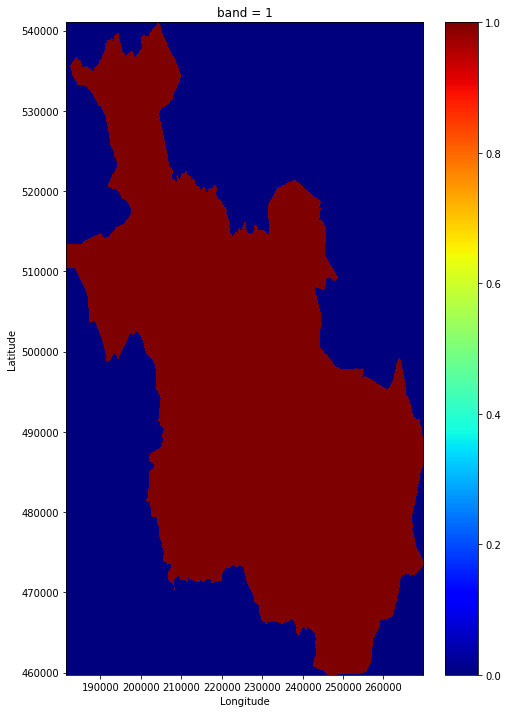

In [156]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Utrecht

In [157]:
import os

In [158]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Utrecht')

In [159]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
Utrecht_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Utrecht\Utrecht.shp')

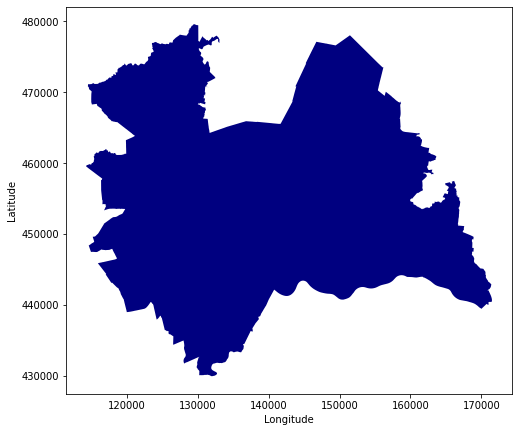

In [161]:
fig, ax = plt.subplots(1, figsize = (8,12))
Utrecht_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [162]:
Utrecht_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [163]:
from osgeo import gdal, ogr, osr

In [164]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Utrecht\Utrecht.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [165]:
#column_names
source_layer.GetExtent()

(114240.997, 171506.371, 429919.006, 479588.289)

In [166]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Utrecht_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:1909, y_res:1656
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC5ECA7B0> >


In [167]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [168]:
import xarray as xr
import rasterio

In [169]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-169-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [170]:
raster

<xarray.DataArray (y: 1656, x: 1909)>
[3161304 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 4.796e+05 4.795e+05 4.795e+05 ... 4.3e+05 4.299e+05
  * x        (x) float64 1.143e+05 1.143e+05 1.143e+05 ... 1.715e+05 1.715e+05
Attributes:
    transform:   (30.0, 0.0, 114240.997, 0.0, -30.0, 479588.289)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [171]:
raster.shape

(1656, 1909)

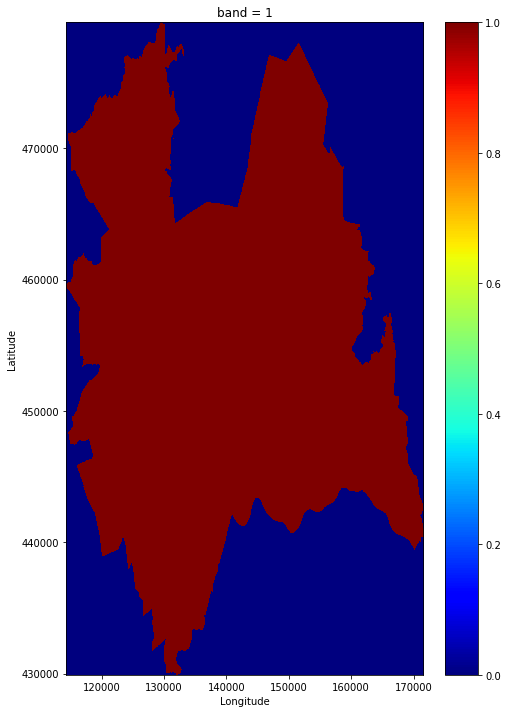

In [172]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Zeeland

In [173]:
import os

In [174]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Zeeland')

In [175]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
Zeeland_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Zeeland\Zeeland.shp')

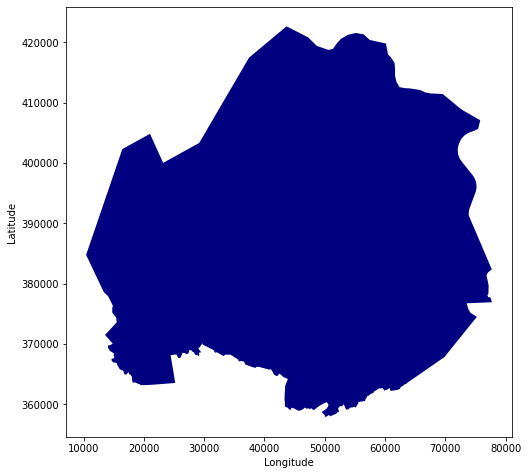

In [178]:
fig, ax = plt.subplots(1, figsize = (8,12))
Zeeland_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [179]:
Zeeland_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [180]:
from osgeo import gdal, ogr, osr

In [181]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Zeeland\Zeeland.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [182]:
#column_names
source_layer.GetExtent()

(10425.156, 77733.07, 357829.15, 422663.23)

In [183]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Zeeland_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:2244, y_res:2161
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC624CEA0> >


In [184]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [185]:
import xarray as xr
import rasterio

In [186]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-186-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [187]:
raster

<xarray.DataArray (y: 2161, x: 2244)>
[4849284 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 4.226e+05 4.226e+05 4.226e+05 ... 3.579e+05 3.578e+05
  * x        (x) float64 1.044e+04 1.047e+04 1.05e+04 ... 7.77e+04 7.773e+04
Attributes:
    transform:   (30.0, 0.0, 10425.156, 0.0, -30.0, 422663.23)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [188]:
raster.shape

(2161, 2244)

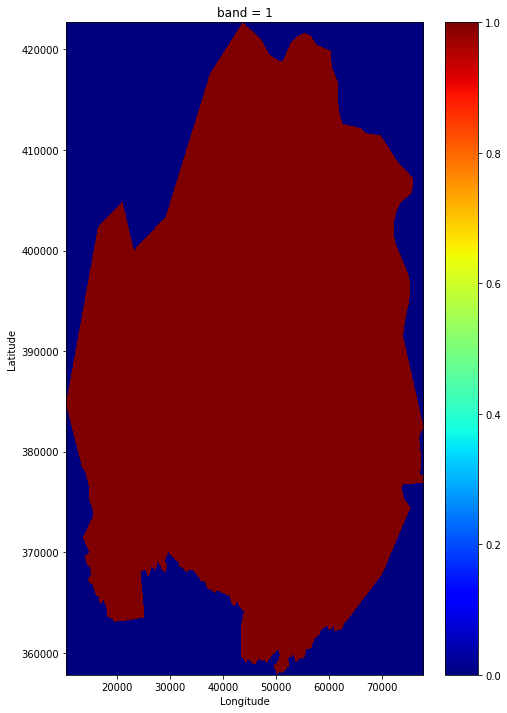

In [189]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Zuid-Holland

In [190]:
import os

In [191]:
os.chdir(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Zuid-Holland')

In [192]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
Zuid_Holland_shapefile = gpd.read_file(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Zuid-Holland\Zuid-Holland.shp')

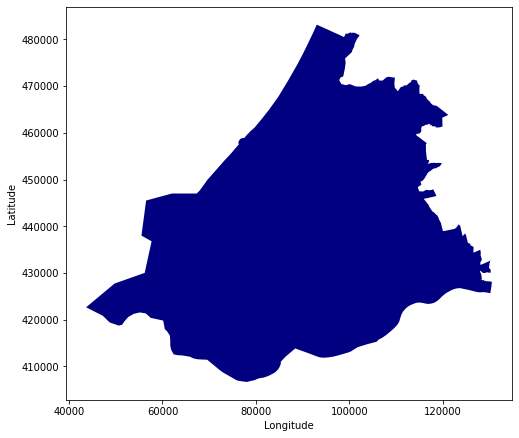

In [194]:
fig, ax = plt.subplots(1, figsize = (8,12))
Zuid_Holland_shapefile.plot(ax=ax, cmap='jet', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Read and convert shapefile to raster using GDAL

In [195]:
Zuid_Holland_shapefile.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [196]:
from osgeo import gdal, ogr, osr

In [197]:
input_shp = ogr.Open(r'E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Zuid-Holland\Zuid-Holland.shp')
source_layer = input_shp.GetLayer()
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [198]:
#column_names
source_layer.GetExtent()

(43662.62, 130480.876, 406692.0, 483120.0)

In [199]:
output_raster_location = r"E:\Masters\IN5000 - Final Project\AI-ForestWatch-Data\Netherlands data\inference\shapefiles\Zuid_Holland_shapefile.tiff"
pixel_size = 30
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round((xmax - xmin) / pixel_size))
y_res = int(round((ymax - ymin) / pixel_size))
print("x_res:{}, y_res:{}".format(x_res, y_res))
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location, x_res, y_res, 1, gdal.GDT_UInt16,['COMPRESS=NONE'])
print(target_ds)

x_res:2894, y_res:2548
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BCC61DD690> >


In [200]:
target_ds.SetGeoTransform((xmin, pixel_size, 0.0, ymax, 0.0, -pixel_size))
srse = osr.SpatialReference()
proj = 'EPSG:28992'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds, [1], source_layer, None, None, [1], options = ['ALL_TOUCHED = TRUE', 'ATTRIBUTE = bg2015'])
target_ds = None

### Open raster using xarray

In [201]:
import xarray as xr
import rasterio

In [202]:
raster = xr.open_rasterio(output_raster_location).squeeze()

<ipython-input-202-6c353b44422e>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio(output_raster_location).squeeze()


In [203]:
raster

<xarray.DataArray (y: 2548, x: 2894)>
[7373912 values with dtype=uint16]
Coordinates:
    band     int32 1
  * y        (y) float64 4.831e+05 4.831e+05 4.83e+05 ... 4.067e+05 4.067e+05
  * x        (x) float64 4.368e+04 4.371e+04 4.374e+04 ... 1.304e+05 1.305e+05
Attributes:
    transform:   (30.0, 0.0, 43662.62, 0.0, -30.0, 483120.0)
    res:         (30.0, 30.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [204]:
raster.shape

(2548, 2894)

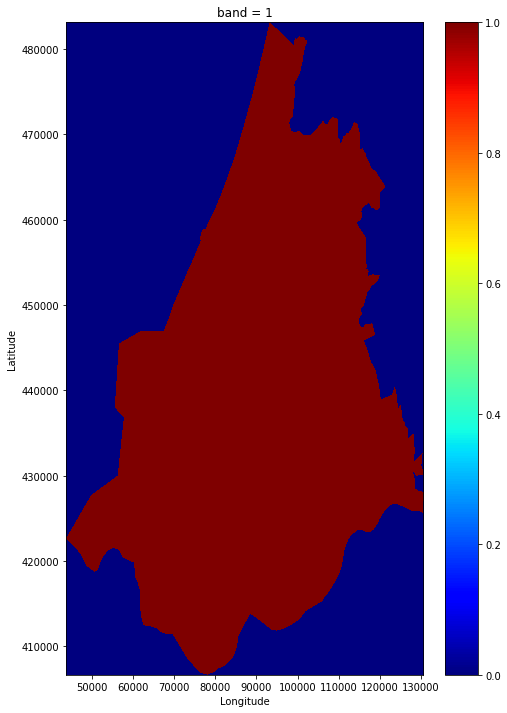

In [205]:
fig, ax = plt.subplots(1, figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()